<div align="center">
    <img src='../../xepimage.png' style='height:100px;'>
</div>


<center><h1 style='font-size:25px'>Model</h1></center>

---

**Autor: Guillermo J. Bergues**

Linear regression for Xepelin project.

Data = Outliers (second approach).

In [1]:
import pandas as pd 
import numpy as np

# Create a test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn import metrics
from scipy.stats import pearsonr

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv ('../../Data/ds_outliers.csv')

In [3]:
df.head()

,PayerId,ReceiverId,days,amount,amountfinancedByXepelin
0,151,19,0,1490.46,0.00
1,126,18,0,920.26,0.00
2,114,37,7,4035.26,0.00
3,122,12,10,27979.20,10520.15
4,55,34,22,1477.46,0.00


In [4]:
# Assigning "y" to score value
y = df['amountfinancedByXepelin']

In [5]:
# Chossing features for the model
X = df[['PayerId',
        'ReceiverId', 
        'days',
        'amount']]

In [6]:
# Use random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [7]:
# Linear regression object
lm = LinearRegression()

In [8]:
# Fit the training data
lm.fit(X_train,y_train)

LinearRegression()

In [9]:
# Coefficients
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf.head()

,Coeff
PayerId,-19.651716
ReceiverId,-37.532541
days,-6.253787
amount,0.509881


In [10]:
# Predictions
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted values')

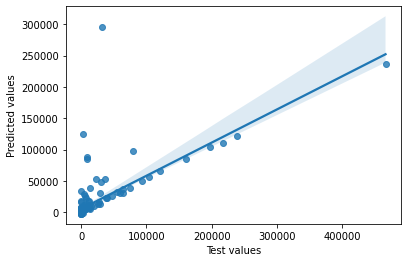

In [11]:
sns.regplot(x=y_test, y=predictions);
plt.xlabel('Test values')
plt.ylabel('Predicted values')

In [12]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8987.960340781727
MSE: 782589358.4690485
RMSE: 27974.798631429832


In [13]:
corr, _ = pearsonr(y_test, predictions)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.721


/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amountfinancedByXepelin', ylabel='Density'>

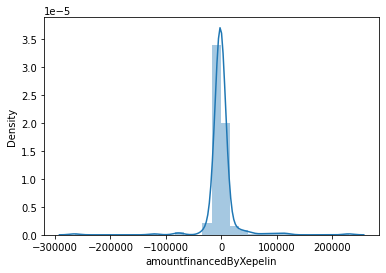

In [14]:
# Distributions of residuals
sns.distplot((y_test-predictions), bins=30)